In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import re

# set the graphs to show in the jupyter notebook
%matplotlib inline

# set seabor graphs to a better style
sns.set(style="ticks")
import os
os.chdir("C:\\Users\\DELL\\Downloads\\Python Foundation End to End Case Study E-Commerce Analytics Project (1)")

In [2]:
import datetime
from datetime import datetime as dt

In [3]:
Customers=pd.read_csv('CUSTOMERS.csv')
Sellers=pd.read_csv('SELLERS.csv')
Products=pd.read_csv('PRODUCTS.csv')
Orders=pd.read_csv('ORDERS.csv')
Order_Items=pd.read_csv('ORDER_ITEMS.csv')
Order_Payments=pd.read_csv('ORDER_PAYMENTS.csv')
Order_Review_Ratings=pd.read_csv('ORDER_REVIEW_RATINGS.csv')
Geo_Location=pd.read_csv('GEO_LOCATION.csv')

# CLEANING

In [4]:
def miss_treat(x):
    if x.dtype=='float' or x.dtype=='int':
        x=x.fillna(x.median())
    else:
        x=x.fillna(x.mode()[0])
    return x    

In [5]:
Sellers=Sellers.apply(miss_treat)

In [6]:
Products=Products.apply(miss_treat)

In [7]:
Orders=Orders.apply(miss_treat)

In [8]:
Orders.order_purchase_timestamp=Orders.order_purchase_timestamp.astype('datetime64')
Orders.order_approved_at=Orders.order_approved_at.astype('datetime64')
Orders.order_delivered_carrier_date=Orders.order_delivered_carrier_date.astype('datetime64')
Orders.order_delivered_customer_date=Orders.order_delivered_customer_date.astype('datetime64')
Orders.order_estimated_delivery_date=Orders.order_estimated_delivery_date.astype('datetime64')

In [9]:
Order_Items=Order_Items.apply(miss_treat)

In [10]:
Order_Items

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,9/19/2017 9:45,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,5/3/2017 11:05,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,1/18/2018 14:48,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,8/15/2018 10:10,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2/13/2017 13:57,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,5/2/2018 4:11,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,7/20/2018 4:31,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,10/30/2017 17:14,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,8/21/2017 0:04,55.99,8.72


In [10]:
Order_Items.shipping_limit_date=Order_Items.shipping_limit_date.astype('datetime64')
Order_Items.order_item_id=Order_Items.order_item_id.astype('object')

In [12]:
Order_Review_Ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   review_id                100000 non-null  object
 1   order_id                 100000 non-null  object
 2   review_score             100000 non-null  int64 
 3   review_creation_date     100000 non-null  object
 4   review_answer_timestamp  100000 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [11]:
Order_Review_Ratings.review_creation_date=Order_Review_Ratings.review_creation_date.astype('datetime64')
Order_Review_Ratings.review_answer_timestamp=Order_Review_Ratings.review_answer_timestamp.astype('datetime64')

In [12]:
Geo_Location.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19015 entries, 0 to 19014
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   geolocation_zip_code_prefix  19015 non-null  int64  
 1   geolocation_lat              19015 non-null  float64
 2   geolocation_lng              19015 non-null  float64
 3   geolocation_city             19015 non-null  object 
 4   geolocation_state            19015 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 742.9+ KB


In [223]:
#cust_od=pd.merge(left=Customers,right=Orders,on='customer_id',how='left')
#cust_rev=pd.merge(left=Order_Items,right=cust_od,on='order_id',how='left')
pro_cus=pd.merge(left=cust_rev,right=Products,on='product_id',how='left')
cust_ordpay=pd.merge(how='inner',left=cust_od,right=Order_Payments,on='order_id')
pay_cus=pd.merge(left=cust_rev,right=Order_Payments,how='inner',on='order_id')
review_pro=pd.merge(left=pro_cus,right=Order_Review_Ratings,on='order_id',how='inner')
loc_rating=pd.merge(left=review_pro,right=Geo_Location,right_on='geolocation_zip_code_prefix',left_on='customer_zip_code_prefix',how='inner')
sell_rating=pd.merge(left=review_pro,right=Sellers,on='seller_id',how='left')

In [81]:

Customers

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,Adilabad,Andhra Pradesh
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,Adoni,Andhra Pradesh
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,Akkarampalle,Andhra Pradesh
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,Akkayapalle,Andhra Pradesh
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,Alwal,Andhra Pradesh
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,Akkarampalle,Andhra Pradesh
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,Nizamabad,Andhra Pradesh
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,Dowleswaram,Andhra Pradesh
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,Vepagunta,Andhra Pradesh


## 1. Perform Detailed exploratory analysis
## a. Define & calculate high level metrics like (Total Revenue, Total quantity, Total products, Total categories, Total sellers, Total locations, Total channels, Total payment methods etc…)

In [75]:
tot_rev=(cust_rev.price).sum()
tot_rev


13591643.700000003

In [17]:
tot_qty=Order_Items.order_item_id.count()

In [18]:
tot_prod=Products.product_id.count()

In [19]:
tot_cat=Products.product_category_name.nunique()

In [20]:
tot_sell=Sellers.seller_id.count()

In [21]:
tot_loc=Geo_Location.geolocation_zip_code_prefix.nunique()

In [22]:
tot_pay_mtd=Order_Payments.payment_type.nunique()

## b. Understanding how many new customers acquired every month


In [212]:
cust_od['month']=Orders.order_purchase_timestamp.dt.to_period('M')

In [24]:
Orders.month.unique()

AttributeError: 'DataFrame' object has no attribute 'month'

In [94]:
t=pd.crosstab(cust_od.month,cust_od.customer_unique_id).sum(axis=1)


In [93]:
y=list(t)
np.sum(y)

99441

In [84]:
cust_each_month=pd.DataFrame(t)

In [153]:
df = cust_od.groupby(['order_id', 'customer_unique_id']).last().reset_index()



In [197]:
customer_per_month = cust_od.groupby(['month', cust_od.customer_unique_id.rename(
    'customer')]).customer_unique_id.count().reset_index()
customer_per_month

,month,customer,customer_unique_id
0,2016-09,208c243a9fe50639cbef36748254ca72,1
1,2016-09,ac162ff796817cd3b69106c684a0e447,1
2,2016-09,be114997aa2e6f93827c7ee261e550c8,1
3,2016-09,d38db8e13c1f15ddbf9fd302a4eaafaa,1
4,2016-10,001a2bf0e46c684031af91fb2bce149d,1
...,...,...,...
99212,2018-09,f60fe3cb5de099b3055c4cefada6c1c7,1
99213,2018-10,202a17812bf14c4879aa314899918c86,1
99214,2018-10,832d9b1424ba5a4e691bdb0bea10ccf8,1
99215,2018-10,bf8195e0faf7723e9c14affbfe36a4ba,1


In [198]:
cust_firstpurch = df.groupby('customer_unique_id').month.min().reset_index(
).rename(columns={'customer_unique_id': 'customer', 'Month_of_Purchase': 'first_month_of_purchase'})
customer_firstpurchase
final = pd.merge(left=customer_count_per_month,
                    right=cust_firstpurch, on='customer')
final

,month_x,customer,customer_unique_id,month_y
0,2016-09,208c243a9fe50639cbef36748254ca72,1,2016-09
1,2016-09,ac162ff796817cd3b69106c684a0e447,1,2016-09
2,2016-09,be114997aa2e6f93827c7ee261e550c8,1,2016-09
3,2016-09,d38db8e13c1f15ddbf9fd302a4eaafaa,1,2016-09
4,2016-10,001a2bf0e46c684031af91fb2bce149d,1,2016-10
...,...,...,...,...
99212,2018-09,d503a54b097839c00b51c1000c863873,1,2018-09
99213,2018-09,f60fe3cb5de099b3055c4cefada6c1c7,1,2018-09
99214,2018-10,202a17812bf14c4879aa314899918c86,1,2018-10
99215,2018-10,832d9b1424ba5a4e691bdb0bea10ccf8,1,2018-10


In [199]:
final.customer_unique_id = np.where(
    final.month_x == final.month_y, 'New_cust', 'Old_cust')
final

,month_x,customer,customer_unique_id,month_y
0,2016-09,208c243a9fe50639cbef36748254ca72,New_cust,2016-09
1,2016-09,ac162ff796817cd3b69106c684a0e447,New_cust,2016-09
2,2016-09,be114997aa2e6f93827c7ee261e550c8,New_cust,2016-09
3,2016-09,d38db8e13c1f15ddbf9fd302a4eaafaa,New_cust,2016-09
4,2016-10,001a2bf0e46c684031af91fb2bce149d,New_cust,2016-10
...,...,...,...,...
99212,2018-09,d503a54b097839c00b51c1000c863873,New_cust,2018-09
99213,2018-09,f60fe3cb5de099b3055c4cefada6c1c7,New_cust,2018-09
99214,2018-10,202a17812bf14c4879aa314899918c86,New_cust,2018-10
99215,2018-10,832d9b1424ba5a4e691bdb0bea10ccf8,New_cust,2018-10


In [202]:
new = final[final.customer_unique_id == 'New_cust'].groupby(
    by='month_x').agg('count')['customer_unique_id']
new

month_x
2016-09       4
2016-10     324
2016-12       1
2017-01     799
2017-02    1778
2017-03    2676
2017-04    2386
2017-05    3670
2017-06    3215
2017-07    3975
2017-08    4264
2017-09    4208
2017-10    4534
2017-11    7352
2017-12    5515
2018-01    7016
2018-02    6445
2018-03    6900
2018-04    6623
2018-05    6509
2018-06    5842
2018-07    5923
2018-08    6119
2018-09      15
2018-10       3
Freq: M, Name: customer_unique_id, dtype: int64

## c. Understand the retention of customers on month on month basis

In [203]:
ret = final[final.customer_unique_id == 'Old_cust'].groupby(
    by='month_x').agg('count')['customer_unique_id']
ret

month_x
2017-03      4
2017-04     14
2017-05     21
2017-06     28
2017-07     44
2017-08     60
2017-09     70
2017-10     90
2017-11    165
2017-12    151
2018-01    240
2018-02    264
2018-03    290
2018-04    297
2018-05    350
2018-06    305
2018-07    349
2018-08    377
2018-09      1
2018-10      1
Freq: M, Name: customer_unique_id, dtype: int64

In [ ]:
cust_each_month['retention']=cust_each_month.cust-cust_each_month.cust_gone 


In [ ]:
cust_each_month.retention=np.where(cust_each_month.retention<0,cust_each_month.cust,cust_each_month.retention)

In [ ]:
cust_each_month

## d. How the revenues from existing/new customers on month on month basis

In [ ]:
cust_od

In [222]:
cust_rev['revenue']=cust_rev.price
cust_rev

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,month,revenue
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:00,58.90,13.29,3ce436f183e68e07877b285a838db11a,871766c5855e863f6eccc05f988b23cb,28013,Guntakal,Andhra Pradesh,delivered,2017-09-13 08:59:00,2017-09-13 09:45:00,2017-09-19 18:34:00,2017-09-20 23:43:00,2017-09-29,2017-03,58.90
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:00,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,eb28e67c4c0b83846050ddfb8a35d051,15775,Kirandul,Chhattisgarh,delivered,2017-04-26 10:53:00,2017-04-26 11:05:00,2017-05-04 14:35:00,2017-05-12 16:04:00,2017-05-15,2017-07,239.90
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:00,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,3818d81c6709e39d06b2738a8d3a2474,35661,Kanker,Chhattisgarh,delivered,2018-01-14 14:33:00,2018-01-14 14:48:00,2018-01-16 12:36:00,2018-01-22 13:19:00,2018-02-05,2017-09,199.00
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:00,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,af861d436cfc08b2c2ddefd0ba074622,12952,Patancheru,Andhra Pradesh,delivered,2018-08-08 10:00:00,2018-08-08 10:10:00,2018-08-10 13:28:00,2018-08-14 13:32:00,2018-08-20,2018-03,12.99
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:00,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,64b576fb70d441e8f1b2d7d446e483c5,13226,Changanassery,Kerala,delivered,2017-02-04 13:57:00,2017-02-04 14:10:00,2017-02-16 09:46:00,2017-03-01 16:42:00,2017-03-17,2017-12,199.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:00,299.99,43.41,b51593916b4b8e0d6f66f2ae24f2673d,0c9aeda10a71f369396d0c04dce13a64,65077,Chilakaluripet,Andhra Pradesh,delivered,2018-04-23 13:57:00,2018-04-25 04:11:00,2018-04-25 12:09:00,2018-05-10 22:56:00,2018-05-18,2017-11,299.99
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:00,350.00,36.53,84c5d4fbaf120aae381fad077416eaa0,0da9fe112eae0c74d3ba1fe16de0988b,81690,Anakapalle,Andhra Pradesh,delivered,2018-07-14 10:26:00,2018-07-17 04:31:00,2018-07-17 08:05:00,2018-07-23 20:31:00,2018-08-01,2017-05,350.00
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:00,99.90,16.95,29309aa813182aaddc9b259e31b870e6,cd79b407828f02fdbba457111c38e4c4,4039,Akkarampalle,Andhra Pradesh,delivered,2017-10-23 17:07:00,2017-10-24 17:14:00,2017-10-26 15:13:00,2017-10-28 12:22:00,2017-11-10,2018-07,99.90
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:00,55.99,8.72,b5e6afd5a41800fdf401e0272ca74655,eb803377c9315b564bdedad672039306,13289,Repalle,Andhra Pradesh,delivered,2017-08-14 23:02:00,2017-08-15 00:04:00,2017-08-15 19:02:00,2017-08-16 21:59:00,2017-08-25,2017-03,55.99


<AxesSubplot:xlabel='month'>

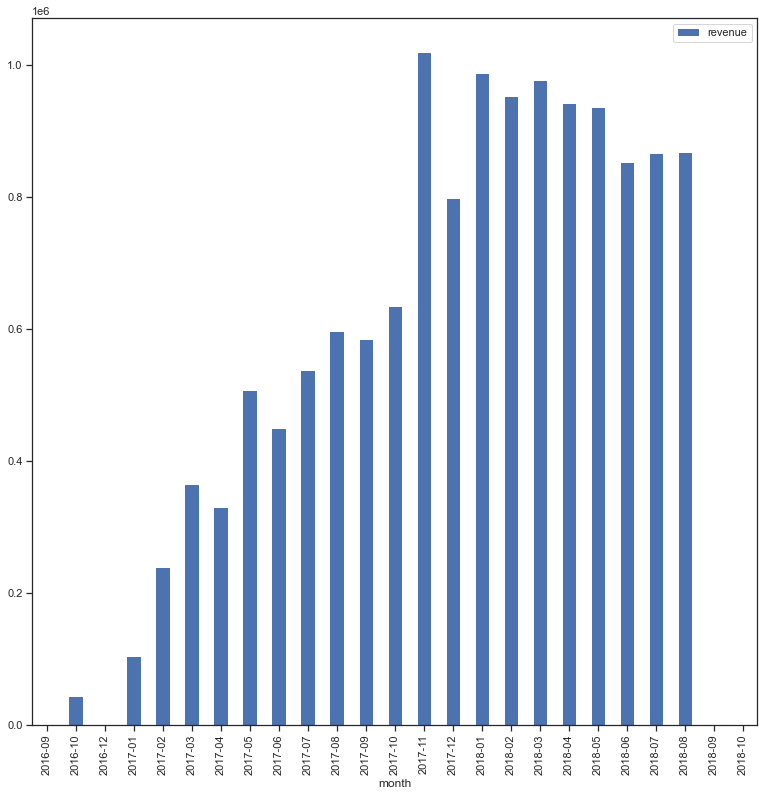

In [239]:
pd.pivot_table(data=cust_rev,index='month',values='revenue',aggfunc='sum').plot(kind='bar',figsize=[13,13])

## e. Understand the trends/seasonality of sales, quantity by category, location, month,week, day, time, channel, payment method etc…

In [ ]:


pro_cus

<AxesSubplot:xlabel='product_category_name'>

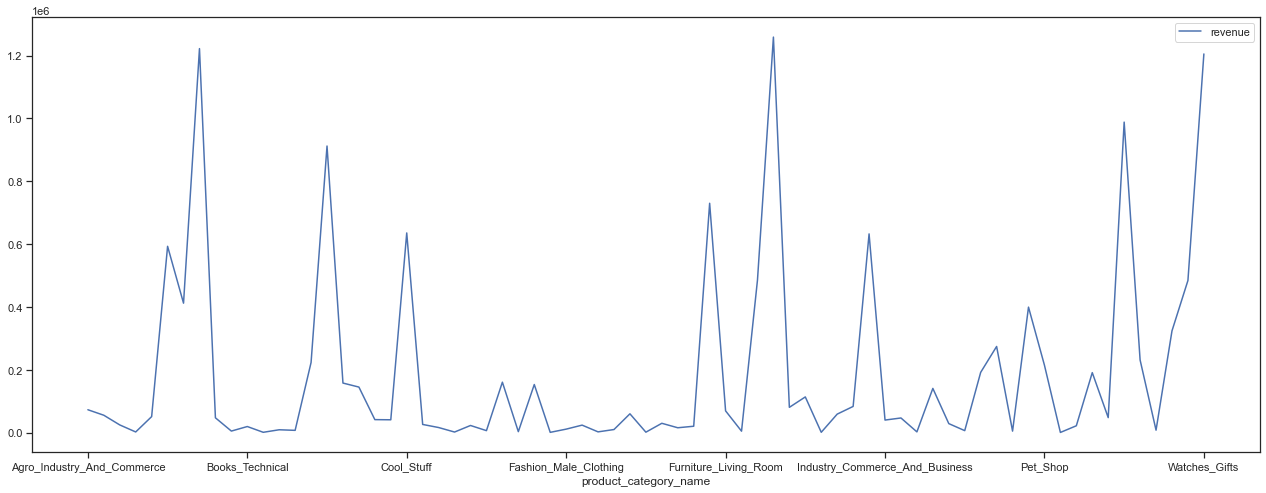

In [246]:
#sales by category
pd.pivot_table(data=pro_cus,index='product_category_name',values='revenue',aggfunc='sum').plot(kind="line",figsize=(22,8))


<AxesSubplot:xlabel='product_category_name'>

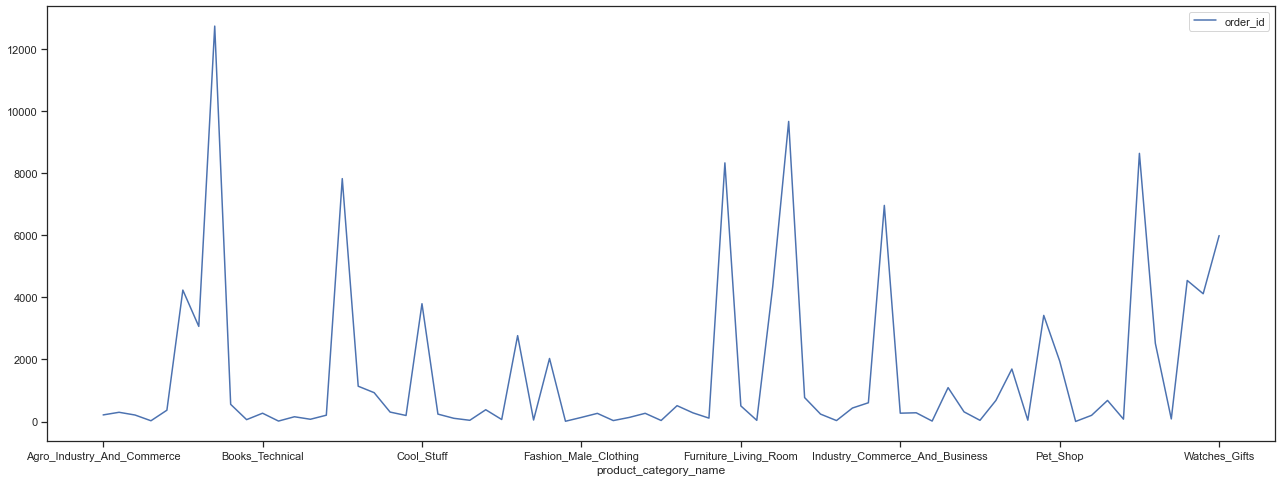

In [248]:
#quantity by category
pd.pivot_table(data=pro_cus,index='product_category_name',values='order_id',aggfunc='count').plot(kind="line",figsize=(22,8))

In [237]:
#sales by location
pd.pivot_table(data=pro_cus,index='customer_city',values='revenue',aggfunc='sum')

,revenue
customer_city,
Aadityana,1608.73
Aambaliyasan,169.80
Aantaliya,13149.78
Aarambhada,5106.24
Abiramam,74.90
...,...
Zamin Uthukuli,107.99
Ziauddin Pur,17574.58
Zira,434.65


In [227]:
#quantity by location
pd.pivot_table(data=pro_cus,index='customer_city',values='order_id',aggfunc='count')

,order_id
customer_city,
Aadityana,18
Aambaliyasan,2
Aantaliya,98
Aarambhada,51
Abiramam,1
...,...
Zamin Uthukuli,2
Ziauddin Pur,157
Zira,4


In [240]:
#sales by month
pd.pivot_table(data=cust_rev,index='month',values='revenue',aggfunc='sum')

,revenue
month,
2016-09,281.59
2016-10,43289.87
2016-12,109.90
2017-01,104755.45
2017-02,239569.20
2017-03,365202.73
2017-04,329290.30
2017-05,506776.40
2017-06,449215.35


In [241]:
#quantity by month
pd.pivot_table(data=cust_rev,index='month',values='order_id',aggfunc='count')

,order_id
month,
2016-09,5
2016-10,398
2016-12,1
2017-01,926
2017-02,2029
2017-03,3030
2017-04,2716
2017-05,4190
2017-06,3681


In [242]:
#qty by payment method
cust_ordpay=pd.merge(how='inner',left=cust_od,right=Order_Payments,on='order_id')

In [229]:
pd.pivot_table(data=cust_ordpay,index='payment_type',values='order_id',aggfunc='count')

,order_id
payment_type,
UPI,19784
credit_card,76795
debit_card,1529
not_defined,3
voucher,5775


In [ ]:
#sales by payment method

In [243]:
pay_cus=pd.merge(left=cust_rev,right=Order_Payments,how='inner',on='order_id')

In [244]:
pd.pivot_table(data=pay_cus,index='payment_type',values='revenue',aggfunc='sum')

,revenue
payment_type,
UPI,2391525.66
credit_card,10974357.30
debit_card,183758.74
voucher,659473.64


## f. Popular Products by month, seller, state, category.

In [249]:
#by month
pro_cus.groupby(['month',pro_cus.product_id.rename('product')]).product_id.count().reset_index().sort_values(by=['month','product_id'],ascending=[True,False])

,month,product,product_id
3,2016-09,e5ae72c62ebfa708624f5029d609b160,2
0,2016-09,154e7e31ebfa092203795c972e5804a6,1
1,2016-09,57e089e3103f5cda6a4ce23b77399bdb,1
2,2016-09,a3126b78e50cb94ff1a2826837bc6877,1
215,2016-10,a62e25e09e05e6faf31d90c6ec1aa3d1,13
...,...,...,...
74944,2018-09,fb29f48bfea41db52e349454f433340e,1
74945,2018-10,06edb72f1e0c64b14c5b79353f7abea3,1
74946,2018-10,1613b819ab5dae53aead2dbb4ebdb378,1
74947,2018-10,36f60d45225e60c7da4558b070ce4b60,1


In [251]:
cus_Sell=pd.merge(left=pro_cus,right=Sellers,on='seller_id',how='left')


In [252]:
#by seller
cus_Sell.groupby(['seller_id',cus_Sell.product_id.rename('product')]).product_id.count().reset_index().sort_values(by=['seller_id','product_id'],ascending=[True,False])

,seller_id,product,product_id
0,0015a82c2db000af6aaaf3ae2ecb0532,a2ff5a97bf95719e38ea2e3b4105bce8,3
1,001cca7ae9ae17fb1caed9dfb1094831,08574b074924071f4e201e151b152b4e,113
11,001cca7ae9ae17fb1caed9dfb1094831,e251ebd2858be1aa7d9b2087a6992580,48
9,001cca7ae9ae17fb1caed9dfb1094831,98a8c2fa16d7239c606640f5555768e4,30
2,001cca7ae9ae17fb1caed9dfb1094831,0da9ffd92214425d880de3f94e74ce39,17
...,...,...,...
34442,ffff564a4f9085cd26170f4732393726,c7d75b3bafed2b1d9475c4876b1c46b8,1
34443,ffff564a4f9085cd26170f4732393726,cb17b798ba889575385281b7ec2fc22b,1
34445,ffff564a4f9085cd26170f4732393726,de6517dda8e49774f58c07f80abc8d7a,1
34446,ffff564a4f9085cd26170f4732393726,e20b58fe57d487f33247e6cc1154eb9c,1


In [253]:
#by state
pro_cus.groupby(['customer_state',pro_cus.product_id.rename('product')]).product_id.count().reset_index().sort_values(by=['customer_state','product_id'],ascending=[True,False])

,customer_state,product,product_id
16353,Andhra Pradesh,aca2eb7d00ea1a7b8ebd4e68314663af,345
14598,Andhra Pradesh,99a4788cb24856965c36a24e339b6058,294
6379,Andhra Pradesh,422879e10f46682990de24d770e7f83d,283
8042,Andhra Pradesh,53b36df67ebb7c41585e8d54d6772e08,225
5444,Andhra Pradesh,389d119b48cf3043d311335e499d9c6b,224
...,...,...,...
55199,West Bengal,fa00124915804f23967ae06d7dfd5874,1
55200,West Bengal,fbce4c4cb307679d89a3bf3d3bb353b9,1
55201,West Bengal,fe05ad488982d6de6373f13486d92d99,1
55202,West Bengal,fe6a9515d655fa7936b8a7c841039f34,1


In [254]:
#by category
pro_cus.groupby(['product_category_name',pro_cus.product_id.rename('product')]).product_id.count().reset_index().sort_values(by=['product_category_name','product_id'],ascending=[True,False])

,product_category_name,product,product_id
7,Agro_Industry_And_Commerce,11250b0d4b709fee92441c5f34122aed,22
24,Agro_Industry_And_Commerce,423a6644f0aa529e8828ff1f91003690,18
35,Agro_Industry_And_Commerce,672e757f331900b9deea127a2a7b79fd,17
22,Agro_Industry_And_Commerce,3bebad3cf2c8d1a8d3ce97174643e054,14
40,Agro_Industry_And_Commerce,a0fe1efb855f3e786f0650268cd77f44,13
...,...,...,...
32943,Watches_Gifts,feeed1b9f26cce6eb3cb81af65eddd9e,1
32944,Watches_Gifts,fef80a5fb121b63bedd4096ff28f6aaa,1
32947,Watches_Gifts,ff7b4560eaf93a8848cd5fde641f39c6,1
32948,Watches_Gifts,ff80f0538290775336ee74b4997a855c,1


## g. Popular categories by state, month

In [255]:
#by state
pro_cus.groupby(['customer_state',pro_cus.product_category_name.rename('category')]).product_category_name.count().reset_index().sort_values(by=['customer_state','product_category_name'],ascending=[True,False])

,customer_state,category,product_category_name
7,Andhra Pradesh,Bed_Bath_Table,8172
43,Andhra Pradesh,Health_Beauty,6023
65,Andhra Pradesh,Sports_Leisure,5327
39,Andhra Pradesh,Furniture_Decor,5239
15,Andhra Pradesh,Computers_Accessories,4859
...,...,...,...
1045,West Bengal,Construction_Tools_Safety,1
1047,West Bengal,Costruction_Tools_Garden,1
1050,West Bengal,Fashion_Male_Clothing,1
1059,West Bengal,Home_Confort,1


In [256]:
#by month
pro_cus.groupby(['month',pro_cus.product_category_name.rename('category')]).product_category_name.count().reset_index().sort_values(by=['month','product_category_name'],ascending=[True,False])

,month,category,product_category_name
1,2016-09,Computers_Accessories,2
0,2016-09,Baby,1
2,2016-09,Furniture_Decor,1
3,2016-09,Health_Beauty,1
8,2016-10,Bed_Bath_Table,39
...,...,...,...
1349,2018-09,Telephony,1
1351,2018-09,Watches_Gifts,1
1353,2018-10,Bed_Bath_Table,2
1352,2018-10,Auto,1


## h. List top 10 most expensive products sorted by price

In [257]:
pro_cus[['product_id','price']].sort_values(by='price',ascending=False).head(10)


,product_id,price
3556,489ae2aa008f021502940f251d4cce7f,6735.00
112233,69c590f7ffc7bf8db97190b6cb6ed62e,6729.00
107841,1bdf5e6731585cf01aa8169c7028d6ad,6499.00
74336,a6492cc69376c469ab6f61d8f44de961,4799.00
11249,c3ed642d592594bb648ff4a04cee2747,4690.00
62086,259037a6a41845e455183f89c5035f18,4590.00
29193,a1beef8f3992dbd4cd8726796aa69c53,4399.87
45843,6cdf8fc1d741c76586d8b6b15e9eef30,4099.99
78310,dd113cb02b2af9c8e5787e8f1f0722f6,4059.00
59137,6902c1962dd19d540807d0ab8fade5c6,3999.90


## 2. Performing Customers/sellers Segmentation

## a. Divide the customers into groups based on the revenue generated

In [258]:
pro_cus.revenue.max()

6735.0

In [259]:
pro_cus.revenue.min()

0.85

In [260]:
pro_cus['revenue_group']=np.where(pro_cus.revenue<3000,'low',np.where(pro_cus.revenue<5000,'medium','high'))

## b. Divide the sellers into groups based on the revenue generated

In [261]:
sellrev=pd.pivot_table(data=pro_cus,index='seller_id',values='revenue',aggfunc='sum')

In [262]:
sellrev

,revenue
seller_id,
0015a82c2db000af6aaaf3ae2ecb0532,2685.00
001cca7ae9ae17fb1caed9dfb1094831,25080.03
001e6ad469a905060d959994f1b41e4f,250.00
002100f778ceb8431b7a1020ff7ab48f,1234.50
003554e2dce176b5555353e4f3555ac8,120.00
...,...
ffcfefa19b08742c5d315f2791395ee5,69.90
ffdd9f82b9a447f6f8d4b91554cc7dd3,2101.20
ffeee66ac5d5a62fe688b9d26f83f534,1839.86


In [263]:
sellrev['sellgroup']=np.where(sellrev["revenue"]<50000,1,(np.where(sellrev["revenue"]<100000,2,
                                np.where(sellrev["revenue"]<150000,3,(np.where(sellrev["revenue"]<200000,4,5))))))

# 3. Cross-Selling (Which products are selling together)
### Hint: We need to find which of the top 10 combinations of products are selling together in each transaction. (combination of 2 or 3 buying together)


In [72]:

d = Order_Items[Order_Items["order_id"].duplicated(keep=False)]


d

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
13,0008288aa423d2a3f00fcb17cd7d8719,1,368c6c730842d78016ad823897a372db,1f50f920176fa81dab994f9023523100,2018-02-21 02:55:00,49.90,13.37
14,0008288aa423d2a3f00fcb17cd7d8719,2,368c6c730842d78016ad823897a372db,1f50f920176fa81dab994f9023523100,2018-02-21 02:55:00,49.90,13.37
32,00143d0f86d6fbd9f9b38ab440ac16f5,1,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:00,21.33,15.10
33,00143d0f86d6fbd9f9b38ab440ac16f5,2,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:00,21.33,15.10
34,00143d0f86d6fbd9f9b38ab440ac16f5,3,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:00,21.33,15.10
...,...,...,...,...,...,...,...
112635,fff8287bbae429a99bb7e8c21d151c41,2,bee2e070c39f3dd2f6883a17a5f0da45,4e922959ae960d389249c378d1c939f5,2018-03-27 12:29:00,180.00,48.14
112640,fffb9224b6fc7c43ebb0904318b10b5f,1,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,2017-11-03 02:55:00,55.00,34.19
112641,fffb9224b6fc7c43ebb0904318b10b5f,2,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,2017-11-03 02:55:00,55.00,34.19
112642,fffb9224b6fc7c43ebb0904318b10b5f,3,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,2017-11-03 02:55:00,55.00,34.19


In [68]:
x=d[['order_id','product_id']]
x

,order_id,product_id
13,0008288aa423d2a3f00fcb17cd7d8719,368c6c730842d78016ad823897a372db
14,0008288aa423d2a3f00fcb17cd7d8719,368c6c730842d78016ad823897a372db
32,00143d0f86d6fbd9f9b38ab440ac16f5,e95ee6822b66ac6058e2e4aff656071a
33,00143d0f86d6fbd9f9b38ab440ac16f5,e95ee6822b66ac6058e2e4aff656071a
34,00143d0f86d6fbd9f9b38ab440ac16f5,e95ee6822b66ac6058e2e4aff656071a
...,...,...
112635,fff8287bbae429a99bb7e8c21d151c41,bee2e070c39f3dd2f6883a17a5f0da45
112640,fffb9224b6fc7c43ebb0904318b10b5f,43423cdffde7fda63d0414ed38c11a73
112641,fffb9224b6fc7c43ebb0904318b10b5f,43423cdffde7fda63d0414ed38c11a73
112642,fffb9224b6fc7c43ebb0904318b10b5f,43423cdffde7fda63d0414ed38c11a73


In [69]:
x['group']=x.groupby(by='order_id')[['product_id']].transform(lambda x : "," . join(x))

C:\Users\DELL\AppData\Local\Temp/ipykernel_18392/1078587971.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['group']=x.groupby(by='order_id')[['product_id']].transform(lambda x : "," . join(x))


In [77]:
x[['order_id','group']]

,order_id,group
13,0008288aa423d2a3f00fcb17cd7d8719,"368c6c730842d78016ad823897a372db,368c6c730842d..."
14,0008288aa423d2a3f00fcb17cd7d8719,"368c6c730842d78016ad823897a372db,368c6c730842d..."
32,00143d0f86d6fbd9f9b38ab440ac16f5,"e95ee6822b66ac6058e2e4aff656071a,e95ee6822b66a..."
33,00143d0f86d6fbd9f9b38ab440ac16f5,"e95ee6822b66ac6058e2e4aff656071a,e95ee6822b66a..."
34,00143d0f86d6fbd9f9b38ab440ac16f5,"e95ee6822b66ac6058e2e4aff656071a,e95ee6822b66a..."
...,...,...
112635,fff8287bbae429a99bb7e8c21d151c41,"bee2e070c39f3dd2f6883a17a5f0da45,bee2e070c39f3..."
112640,fffb9224b6fc7c43ebb0904318b10b5f,"43423cdffde7fda63d0414ed38c11a73,43423cdffde7f..."
112641,fffb9224b6fc7c43ebb0904318b10b5f,"43423cdffde7fda63d0414ed38c11a73,43423cdffde7f..."
112642,fffb9224b6fc7c43ebb0904318b10b5f,"43423cdffde7fda63d0414ed38c11a73,43423cdffde7f..."


## 4 Payment Behaviour
## a. How customers are paying?

In [264]:
Order_Payments.payment_type.unique()

array(['credit_card', 'UPI', 'voucher', 'debit_card', 'not_defined'],
      dtype=object)

### b. Which payment channels are used by most customers?

In [265]:
pd.pivot_table(data=cust_ordpay,index='payment_type',values='customer_id',aggfunc='count').sort_values(by='customer_id',ascending=False)

,customer_id
payment_type,
credit_card,76795
UPI,19784
voucher,5775
debit_card,1529
not_defined,3


## 5. Customer satisfaction towards category & product
## a. Which categories (top 10) are maximum rated & minimum rated?

In [ ]:
review_pro=pd.merge(left=pro_cus,right=Order_Review_Ratings,on='order_id',how='inner')

In [ ]:
review_pro

In [272]:
maxi=pd.pivot_table(data=review_pro,index='product_category_name',values='review_score',aggfunc='mean').sort_values(by='review_score',ascending=False).head(10)
mini=pd.pivot_table(data=review_pro,index='product_category_name',values='review_score',aggfunc='mean').sort_values(by='review_score',ascending=True).head(10)

## b. Which products (top10) are maximum rated & minimum rated?

In [274]:
maxim=pd.pivot_table(data=review_pro,index='product_id',values='review_score',aggfunc='mean').sort_values(by='review_score',ascending=False).head(10)
minim=pd.pivot_table(data=review_pro,index='product_id',values='review_score',aggfunc='mean').sort_values(by='review_score',ascending=True).head(10)

## c. Average rating by location, seller, product, category, month etc.

In [ ]:
pro_cus

In [ ]:
loc_rating=pd.merge(left=review_pro,right=Geo_Location,right_on='geolocation_zip_code_prefix',left_on='customer_zip_code_prefix',how='inner')

In [ ]:
loc_rating

In [277]:
loc_rating_avg=pd.pivot_table(data=loc_rating,index='geolocation_state',values='review_score',aggfunc='mean').sort_values(by='review_score',ascending=False)

In [278]:
loc_rating_avg

,review_score
geolocation_state,
Goa,4.777778
Punjab,4.154812
Rajasthan,4.137560
Uttar Pradesh,4.124646
Haryana,4.119258
Tamil Nadu,4.104758
Orissa,4.103668
Maharashtra,4.072122
Kerala,4.062500


In [ ]:
sell_rating=pd.merge(left=review_pro,right=Sellers,on='seller_id',how='left')

In [279]:
sell_rating_avg=pd.pivot_table(data=sell_rating,index='seller_id',values='review_score',aggfunc='mean')

In [280]:
sell_rating_avg.head()

,review_score
seller_id,
0015a82c2db000af6aaaf3ae2ecb0532,3.666667
001cca7ae9ae17fb1caed9dfb1094831,3.874477
001e6ad469a905060d959994f1b41e4f,1.000000
002100f778ceb8431b7a1020ff7ab48f,3.982143
003554e2dce176b5555353e4f3555ac8,5.000000


In [281]:
pro_Rating=pd.pivot_table(data=review_pro,index='product_id',values='review_score',aggfunc='mean').sort_values(by='review_score',ascending=False)
pro_Rating

,review_score
product_id,
00066f42aeeb9f3007548bb9d3f33c38,5.0
86743ff92eee3d16b7df59cddd583b8c,5.0
868ceb027ab706a4dee42e2220006b85,5.0
868969d3a93aeeab7bfcd4fc3d3d65de,5.0
868766ed2172644fdd977d6bd395a107,5.0
...,...
6b3e612bee768d758d981f0d7992e07e,1.0
1890c01a38d17958d79fe473d451dc9c,1.0
94982c575245c1664b51851ec653a79e,1.0


In [282]:
procat_Rating=pd.pivot_table(data=review_pro,index='product_category_name',values='review_score',aggfunc='mean').sort_values(by='review_score',ascending=False)
procat_Rating

,review_score
product_category_name,
Cds_Dvds_Musicals,4.642857
Fashion_Childrens_Clothes,4.500000
Books_General_Interest,4.439421
Books_Imported,4.400000
Costruction_Tools_Tools,4.359223
...,...
Fashion_Male_Clothing,3.621212
Office_Furniture,3.484421
Home_Comfort_2,3.366667


In [283]:
month_rating=pd.pivot_table(data=review_pro,index='month',values='review_score',aggfunc='mean').sort_values(by='review_score',ascending=False)

In [284]:
month_rating

,review_score
month,
2016-09,5.000000
2017-03,4.065988
2018-07,4.052829
2017-07,4.044870
2017-10,4.041277
2018-04,4.038286
2018-05,4.038039
2017-05,4.036976
2017-12,4.034504
